In [20]:
#!conda install -c conda-forge mnist -y 

In [4]:
import keras
import tensorflow
import mnist

In [21]:
# The full neural network code!
###############################
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [22]:
#!pip install mnist keras tensorflow

In [23]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

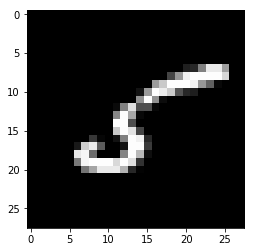

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = train_images[11]
plt.imshow(first_image, cmap='gray')
plt.show()

In [25]:
# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

In [30]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [42]:
train_images.shape

(60000, 784)

In [44]:
test_images.shape

(10000, 784)

In [34]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
    
    
    
  Dense(64, activation='relu'),
    
    
  Dense(10, activation='softmax'),
])

In [39]:
# Compile the model.
model.compile(
  optimizer='adam',
    
  loss='categorical_crossentropy',
    
  metrics=['accuracy'],
)

In [40]:
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=7,
  batch_size=32,
)

Epoch 1/7
60000/60000 [==============================] - 4s 64us/step - loss: 0.0601 - accuracy: 0.9813
Epoch 2/7
60000/60000 [==============================] - 4s 59us/step - loss: 0.0404 - accuracy: 0.9872
Epoch 3/7
60000/60000 [==============================] - 3s 56us/step - loss: 0.0320 - accuracy: 0.9897
Epoch 4/7
60000/60000 [==============================] - 3s 56us/step - loss: 0.0251 - accuracy: 0.9915
Epoch 5/7
60000/60000 [==============================] - 4s 62us/step - loss: 0.0199 - accuracy: 0.9931
Epoch 6/7
60000/60000 [==============================] - 4s 66us/step - loss: 0.0197 - accuracy: 0.9935
Epoch 7/7
60000/60000 [==============================] - 4s 59us/step - loss: 0.0166 - accuracy: 0.9942


In [45]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 35us/step


[0.09471861194860103, 0.977400004863739]

In [52]:
test_images[44].reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

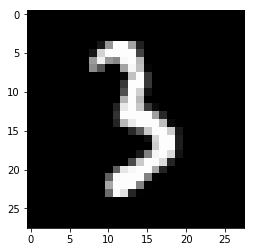

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = test_images[44]
plt.imshow(first_image.reshape((28,28)), cmap='gray')
plt.show()

In [54]:
np.argmax(model.predict(test_images[44].reshape((-1,784))))

3

In [55]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


In [56]:
!pwd

/Users/manishanker.talusani/Statistics_ML_26Aug
